In [1]:
# Biblotecas de manipulação de dados
import numpy as np
import pandas as pd
# Bibliotecas de visualização
import seaborn as sns
import matplotlib.pyplot as plt
# Testes estatísticos
from scipy.stats import ttest_ind


from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import datasets
from sklearn.metrics import classification_report 

# Bibliotecas Locais
from carga import *
from tratamentos import *
from categorizacao import *

pfEnade = doCarga('microdados_enade_2019.txt')
# TRATAMENTOS 
pfEnade = doIdade(pfEnade)
pfEnade = doNota(pfEnade)
pfEnade = doVazios(pfEnade)
pfEnade = doPublicoPrivada(pfEnade)
pfEnade = doHumanasExatas(pfEnade)
pfEnade = doRenda(pfEnade)
pfEnade = doMigracao(pfEnade)
pfEnade = doRenda(pfEnade)
pfEnade = doEscolaridade(pfEnade)
pfEnade = doCategoricos(pfEnade)

In [2]:
# 'CO_CATEGAD'  - Categórico - Código da categoria administrativa da IES
# 'CO_GRUPO'    - Categórico - Código da Área de enquadramento do curso no Enade
# 'TP_SEXO'     - Categórico - 
# 'ANO_FIM_EM'  - NORMALIZADO
# 'ANO_IN_GRAD' - NORMALIZADO
# 'QE_I08'      - Categórico - Qual a renda total de sua família, incluindo seus rendimentos?
# 'QE_I16'      - Categórico - Em que unidade da Federação você concluiu o ensino médio?
# 'QE_I17'      - Categórico - Em que tipo de escola você cursou o ensino médio?	
# 'QE_I04'      - Categórico - Até que etapa de escolarização seu pai concluiu?
# 'QE_I05'      - Categórico - Até que etapa de escolarização sua mãe concluiu?
# 'CO_UF_CURSO' - Categórico - Código da UF de funcionamento do curso
# 03 'NT_GER'      - NORMALIZADO- Nota bruta da prova - (valor de 0 a 100)
# 'QE_I23'      - Categórico - Quantas horas por semana você dedicou aos estudos, excetuando as horas de aula?
# 'QE_I07'      - Categórico - Quantas pessoas da sua família moram com você?  
# RendaCAT
# RendaDIC

# doRendaDIC()
# doHEstudoDIC()
# doSexoDIC()
# doMigradoDIC()
# 19 QE_I08CAT  
# 20 QE_I23CAT
#xdf = pfEnade.iloc[:,[15, 20]]

In [3]:
pfEnade.columns



Index(['CO_GRUPO', 'CO_UF_CURSO', 'TP_SEXO', 'NT_GER', 'QE_I04', 'QE_I05',
       'QE_I07', 'QE_I08', 'QE_I16', 'QE_I17', 'QE_I23', 'Indice', 'Tempo',
       'Publica', 'Exatas', 'RendaDIC', 'Migrado', 'EPai', 'EscolaridadeDesc',
       'QE_I08CAT', 'QE_I23CAT'],
      dtype='object')

In [4]:
pfEnade.columns

xdf = pd.DataFrame(pfEnade, columns = ['NT_GER']) # , 'QE_I23CAT'])
# xdf = pfEnade.iloc[:,[19, 3]]
#xdf.plot.scatter(0,1,)

In [5]:
# y = Prediction Target - Rótulo - que a gente quer prever - y = f(X)

#y = pfEnade.QE_I08
# y = pfEnade.NT_GER
y = pd.DataFrame(pfEnade, columns = ['QE_I08CAT']) # , 'QE_I23CAT'])
y.head()

,QE_I08CAT
0,4
1,4
3,4
5,5
6,3


In [6]:
# X = Data Features - Características 

# enade_features = ['NT_GER', 'Migrado']
#enade_features = ['QE_I08']
enade_features = ['NT_GER']
X = pfEnade[enade_features]
X.describe()

,NT_GER
count,331749.000000
mean,44.756172
std,14.422866
min,1.300000
25%,34.000000
50%,44.600000
75%,55.400000
max,86.900000


In [7]:
# Definir o modelo -- my_model = ModelName()

enade_model = DecisionTreeRegressor(random_state=1) # Cria um novo modelo não treinado
enade_model.fit(X, y)

DecisionTreeRegressor(random_state=1)

In [8]:
print(X.head())


   NT_GER
0    51.9
1    54.2
3    42.1
5    49.3
6    49.6


In [9]:
print(enade_model.predict(X.head()))

[3.50617284 3.49856734 3.29487179 3.45588235 3.4228275 ]


In [10]:
enade_model.fit(X, y)

DecisionTreeRegressor(random_state=1)

In [11]:
print(X.head())
print(enade_model.predict(X.head()))

   NT_GER
0    51.9
1    54.2
3    42.1
5    49.3
6    49.6
[3.50617284 3.49856734 3.29487179 3.45588235 3.4228275 ]


In [12]:
# Dividindo Grupos de Treinamento
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [13]:
X_train.shape

(222271, 1)

In [14]:
X_test.shape 

(109478, 1)

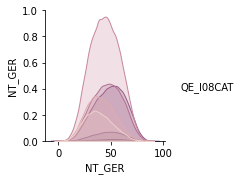

In [15]:
# Plotar em pares 
# tentar visualizar se é possível um divisão linear (no caso não é)
#sns.pairplot(pfEnade[['QE_I08CAT', 'QE_I23CAT', 'NT_GER']], hue='QE_I08CAT')
sns.pairplot(pfEnade[['QE_I08CAT', 'NT_GER']], hue='QE_I08CAT')

In [16]:
# SVM - Support Vector Machines
# Separar classes por linha reta
C=1.0   # marge 
clf = svm.SVC(kernel='linear', C=C)


In [17]:
clf.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SVC(kernel='linear')

In [18]:
y_pred = clf.predict(X_test)

In [19]:
clf.score(X_test, y_test)

0.3887447706388498

In [20]:
# Relatório de Classificação F1
# print (classification_report(y_test, y_pred))
target_names=doQE_I08DIC()
print (classification_report(y_test, y_pred, target_names=target_names))

                 precision    recall  f1-score   support

4,5 to 6 salary       0.00      0.00      0.00      9220
   < 1,5 salary       0.00      0.00      0.00     14064
    > 30 salary       0.39      1.00      0.56     42559
3 to 4,5 salary       0.00      0.00      0.00     20267
1,5 to 3 salary       0.00      0.00      0.00     19621
10 to 30 salary       0.00      0.00      0.00      3138
 6 to 10 salary       0.00      0.00      0.00       609

       accuracy                           0.39    109478
      macro avg       0.06      0.14      0.08    109478
   weighted avg       0.15      0.39      0.22    109478

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
